In [1]:
import pandas as pd

In [2]:
df = pd.read_json('timeline_tmp.json')
df.iloc[4]['info'][10].keys()

dict_keys(['events', 'participantFrames', 'timestamp'])

In [3]:
position_data = []
for i in range(len(df.iloc[4]['info'])):
    loopdata = df.iloc[4]['info'][i]['participantFrames']
    c = pd.DataFrame(pd.DataFrame.from_dict(loopdata).loc['position']).transpose()
    c['timestamp'] = df.iloc[4]['info'][i]['timestamp']
    position_data.append(c)
df = pd.concat(position_data)

In [4]:
df

,1,2,3,4,5,6,7,8,9,10,timestamp
position,"{'x': 554, 'y': 581}","{'x': 557, 'y': 345}","{'x': 335, 'y': 269}","{'x': 194, 'y': 457}","{'x': 329, 'y': 650}","{'x': 14180, 'y': 14271}","{'x': 14176, 'y': 14506}","{'x': 14398, 'y': 14582}","{'x': 14539, 'y': 14394}","{'x': 14404, 'y': 14201}",0
position,"{'x': 4335, 'y': 11842}","{'x': 3001, 'y': 11275}","{'x': 4391, 'y': 11745}","{'x': 4386, 'y': 11911}","{'x': 394, 'y': 461}","{'x': 6099, 'y': 12437}","{'x': 11227, 'y': 13378}","{'x': 8809, 'y': 8732}","{'x': 11722, 'y': 4105}","{'x': 12280, 'y': 3350}",60024
position,"{'x': 2148, 'y': 12061}","{'x': 6936, 'y': 4607}","{'x': 7500, 'y': 7056}","{'x': 10893, 'y': 1570}","{'x': 10956, 'y': 1409}","{'x': 2058, 'y': 12678}","{'x': 7995, 'y': 9843}","{'x': 7598, 'y': 7730}","{'x': 11824, 'y': 2188}","{'x': 11939, 'y': 1579}",120049
position,"{'x': 1597, 'y': 10787}","{'x': 1166, 'y': 1692}","{'x': 7348, 'y': 6784}","{'x': 1556, 'y': 595}","{'x': 10714, 'y': 2437}","{'x': 1363, 'y': 11665}","{'x': 14340, 'y': 14391}","{'x': 7939, 'y': 7101}","{'x': 11576, 'y': 1934}","{'x': 13383, 'y': 11544}",180071
position,"{'x': 4148, 'y': 13085}","{'x': 3131, 'y': 8406}","{'x': 3442, 'y': 2793}","{'x': 13737, 'y': 3704}","{'x': 13173, 'y': 3669}","{'x': 4146, 'y': 13592}","{'x': 11734, 'y': 4296}","{'x': 7728, 'y': 8393}","{'x': 14020, 'y': 4343}","{'x': 13228, 'y': 4202}",240077
position,"{'x': 500, 'y': 892}","{'x': 9721, 'y': 6417}","{'x': 7184, 'y': 6556}","{'x': 10491, 'y': 1465}","{'x': 10647, 'y': 2194}","{'x': 3368, 'y': 13641}","{'x': 8857, 'y': 5682}","{'x': 7550, 'y': 7550}","{'x': 14241, 'y': 14192}","{'x': 6944, 'y': 7406}",300101
position,"{'x': 5491, 'y': 13310}","{'x': 2145, 'y': 3185}","{'x': 11707, 'y': 6703}","{'x': 11819, 'y': 2178}","{'x': 3495, 'y': 893}","{'x': 4733, 'y': 14030}","{'x': 11496, 'y': 12936}","{'x': 8570, 'y': 8301}","{'x': 13377, 'y': 4455}","{'x': 13174, 'y': 8499}",360108
position,"{'x': 1785, 'y': 11448}","{'x': 9686, 'y': 3410}","{'x': 2139, 'y': 875}","{'x': 4456, 'y': 1064}","{'x': 12652, 'y': 2065}","{'x': 1519, 'y': 12224}","{'x': 13862, 'y': 4189}","{'x': 9892, 'y': 9627}","{'x': 14423, 'y': 12485}","{'x': 13276, 'y': 4062}",420135
position,"{'x': 1838, 'y': 11473}","{'x': 10613, 'y': 5130}","{'x': 7058, 'y': 6931}","{'x': 11486, 'y': 3450}","{'x': 11774, 'y': 2812}","{'x': 6209, 'y': 14020}","{'x': 12662, 'y': 5988}","{'x': 7900, 'y': 7495}","{'x': 12880, 'y': 3284}","{'x': 12973, 'y': 3297}",480146
position,"{'x': 1266, 'y': 10250}","{'x': 5146, 'y': 9379}","{'x': 6459, 'y': 6345}","{'x': 11423, 'y': 1451}","{'x': 11350, 'y': 1859}","{'x': 1546, 'y': 11284}","{'x': 7773, 'y': 10371}","{'x': 7718, 'y': 7612}","{'x': 12337, 'y': 2146}","{'x': 12474, 'y': 1492}",540156


In [7]:
df = pd.read_json('timeline_tmp.json')
def damage_receive_aggreagate(series):
    dmgdict = {}
    for i in range(0,11):
        dmgdict[i] =0
    for i in  series['victimDamageReceived']:
        ID = i['participantId']
        dmg= i['physicalDamage']+i['trueDamage']+i['magicDamage']
        dmgdict[ID]+= dmg 
    return dmgdict
def kill_data(dff):
    eventsdf = pd.DataFrame.from_dict(dff['events'])
    if sum(eventsdf['type']=='CHAMPION_KILL')!=0:
        killevent =eventsdf[eventsdf['type']=='CHAMPION_KILL'][['timestamp','bounty','killStreakLength',
                                                                'killerId','victimId','position','shutdownBounty',
                                                                'victimDamageDealt','victimDamageReceived']]
        killevent['DRG_Summary'] = killevent.apply(damage_receive_aggreagate,axis=1)
        killevent['real_killer'] = killevent.apply(lambda x:max(x['DRG_Summary'], key=x['DRG_Summary'].get),axis=1)
        killevent['real_killer_dmg'] = killevent.apply(lambda x:x['DRG_Summary'][x['real_killer']],axis=1)
        killevent['position_x'] = killevent.apply(lambda x:x['position']['x'],axis=1)
        killevent['position_y'] = killevent.apply(lambda x:x['position']['y'],axis=1)
        return killevent[['timestamp','position_x','position_y','bounty','killerId','killerId','real_killer','real_killer_dmg']]
lists = []
for j in df.iloc[4]['info']:
    lists.append(kill_data(j))
pd.concat(lists)

,timestamp,position_x,position_y,bounty,killerId,killerId,real_killer,real_killer_dmg
30,163615,11378,3742,400.0,4.0,4.0,2,344
33,164639,11344,3936,300.0,10.0,10.0,9,282
40,169493,11611,4486,300.0,9.0,9.0,9,388
41,169526,11681,4232,300.0,4.0,4.0,4,390
52,176462,10714,2437,300.0,9.0,9.0,9,590
...,...,...,...,...,...,...,...,...
0,1862603,13231,9978,274.0,3.0,3.0,3,2445
1,1869145,14066,11253,274.0,1.0,1.0,3,1630
22,1888609,13986,12334,274.0,4.0,4.0,4,2017
23,1891218,13725,12846,274.0,1.0,1.0,1,1914


#  Real killer Dmg... Steady growing over time 

<AxesSubplot:xlabel='timestamp'>

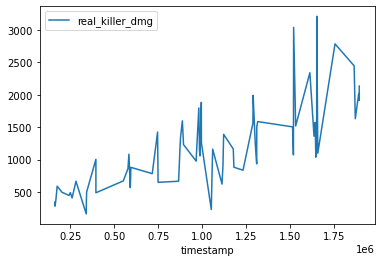

In [8]:
pd.concat(lists).plot(x = 'timestamp',y='real_killer_dmg')

In [14]:
import numpy 
import seaborn as sns

#  late kill happened at enemy's base.

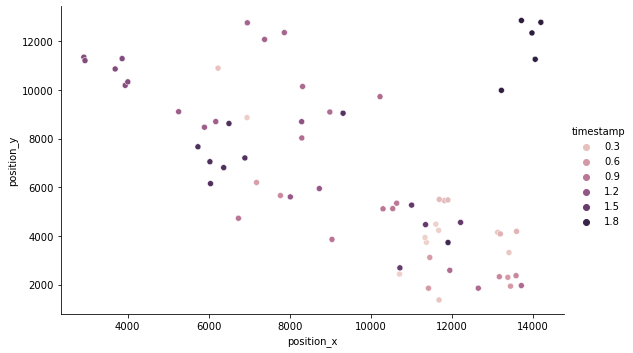

In [18]:
sns.relplot(data=pd.concat(lists), x='position_x', y='position_y', hue='timestamp', aspect=1.61)
plt.show()
## OK ... Early kill at bot, then ahve some jg fights....